In [ ]:
#Install Relevant Packages
!pip install stats
!pip install scipy.stats
!pip install pandas

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification

#read the QNBT data
churn = pd.read_csv('/content/FinalProject_Efficient.csv')

#read the Experience Correlates Data
ec_df = pd.read_csv('/content/ExperienceCorrelates.csv')

#read the Personal Customer Churn Data
pcc_df = pd.read_csv('/content/Personal_Customer_Churn_updated.csv')

#view first 5 rows of data
print(pcc_df[:5])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement scipy.stats (from versions: none)
ERROR: No matching distribution found for scipy.stats
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
   Number of Accounts  Number of Churned Accounts  Accounts Remaining  \
0                   1                           0                   1   
1                   1                           0                   1   
2                   1                           0                   1   
3                   1                           0                   1   
4                   1                           0                   1   

   Customer-Level Churn  Churned Age_demographics Customer_type  \
0                     0        0            Ge

In [ ]:
#Check for Null Values
churn.isnull().head()
churn.isnull().sum()

ec_df.isnull().head()
ec_df.isnull().sum()

pcc_df.isnull().head()
pcc_df.isnull().sum()

Number of Accounts            0
Number of Churned Accounts    0
Accounts Remaining            0
Customer-Level Churn          0
Churned                       0
Age_demographics              0
Customer_type                 0
Personal_customer_type        0
#_CK_Cust                     0
#_Debit_Card_Cust             0
#_SV_Cust                     0
#_TD_Cust                     0
#_Loan_Cust                   0
#_SDB_Cust                    0
VRU_90_days                   0
WM_Customer                   0
Mortgage_Customer             0
Time_deposit_balance          0
Loan_balance                  0
Credit_Card_Limit             0
WM_Market_Value               0
Last_Mortgage_Loan_Amount     0
Credit_Card_Flag              0
Number_Days_Past_Due_Loans    0
Customer_Since                0
Years as a Customer           0
dtype: int64

0    55505
1     1547
Name: Churned, dtype: int64


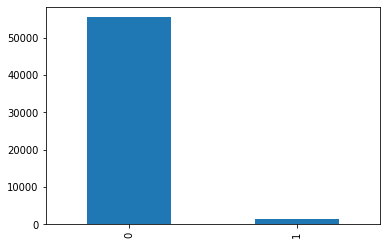

In [ ]:
#Counting 1 and 0 Value in Churn column
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = churn["Churned"].map(lambda x: color_wheel.get(x + 1))
print(churn["Churned"].value_counts())
p=churn["Churned"].value_counts().plot(kind="bar")

0    35748
1     1159
Name: Churned, dtype: int64


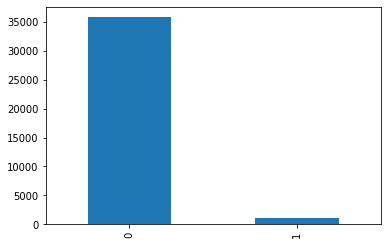

In [ ]:
#Counting 1 and 0 Value in Churn column for Personal Customers
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = pcc_df["Churned"].map(lambda x: color_wheel.get(x + 1))
print(pcc_df["Churned"].value_counts())
p=pcc_df["Churned"].value_counts().plot(kind="bar")

In [ ]:
churn.dtypes
ec_df.dtypes

Churned                            int64
Open_Date                         object
Branch_number                      int64
Overdraft_fees_YTD                 int64
Return_fees_YTD                    int64
Overdrafts_Charged_QTD             int64
Overdrafts_Waived_QTD              int64
Service_Charges                  float64
Overdraft_and_Return_Fees          int64
Transaction_Fees                   int64
Type_Code                          int64
Fibonacci_Experience               int64
Experience_Based_on_Status         int64
Status_code                       object
Online_Statement_Flag             object
Age_demographics                  object
Customer_Exposure                  int64
Credit_Card_Flag                   int64
Number_Days_Past_Due_Loans         int64
Years_as_a_Customer              float64
Customer_Since                    object
Number_of_Transactions             int64
Interest_Payment                   int64
Deposits_Count                     int64
Mobile_Deposits_

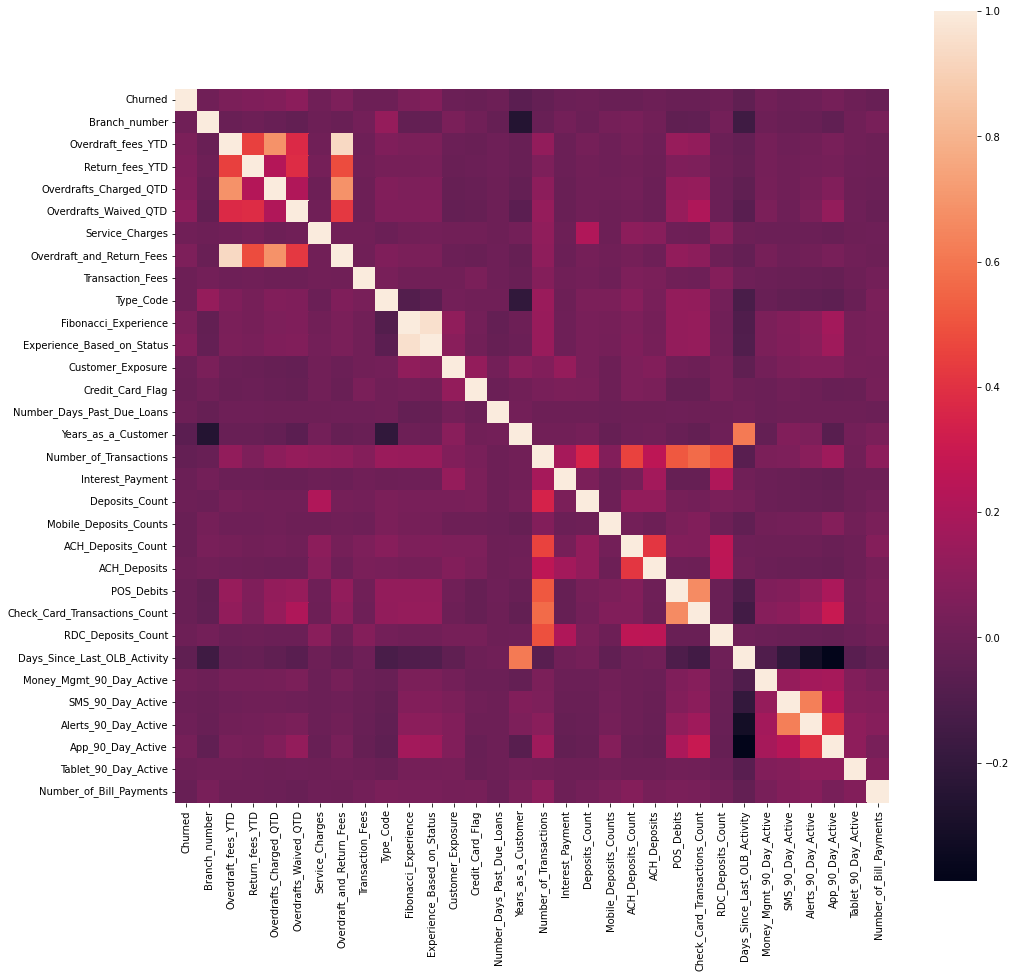

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(ec_df.corr(), fmt='.2g', square=True)

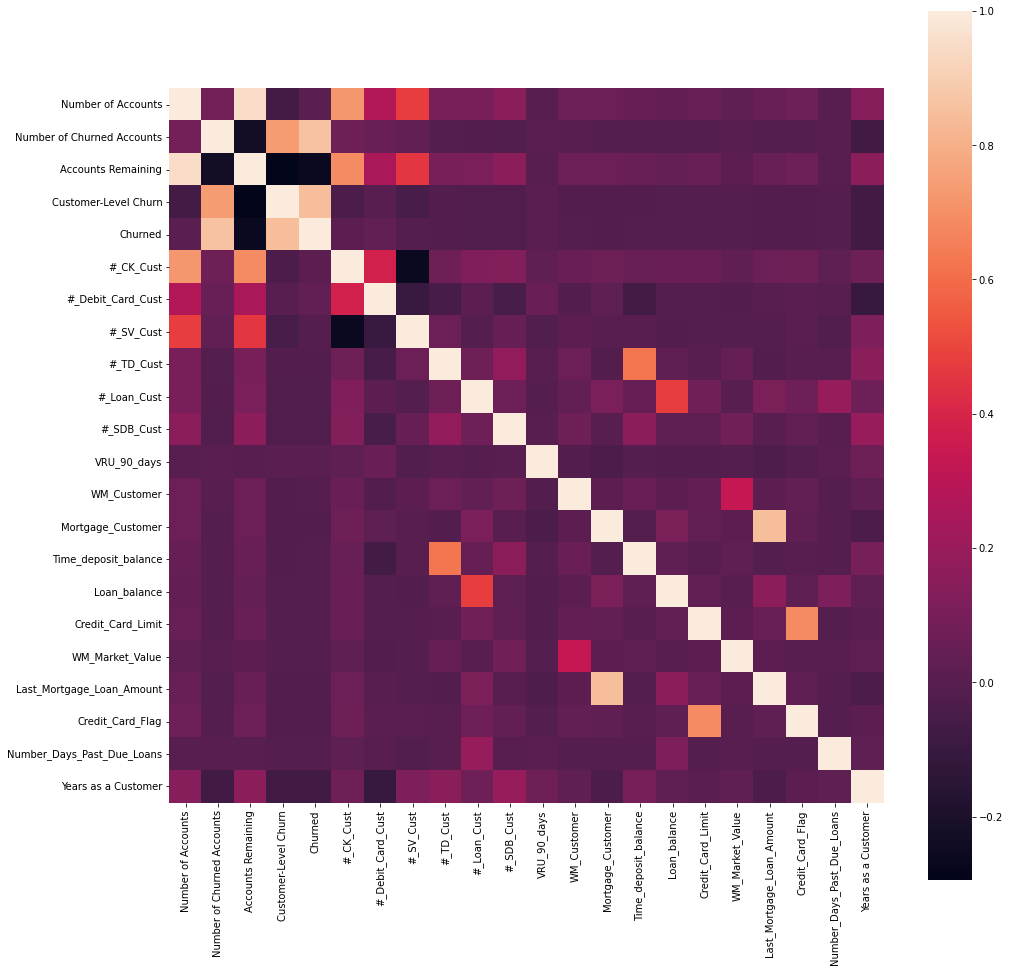

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(pcc_df.corr(), fmt='.2g', square=True)

In [ ]:
#Summary Stat for Years as a Customer
churn['Years_as_a_Customer'].describe()

KeyError: ignored

In [ ]:
churn["Age_demographics"].dropna()

0             Gen X
1             Gen X
2        Millennial
3            Boomer
4            Boomer
            ...    
57047         Gen Z
57048        Boomer
57049         Gen Z
57050        Silent
57051        Boomer
Name: Age_demographics, Length: 57052, dtype: object

KeyError: ignored

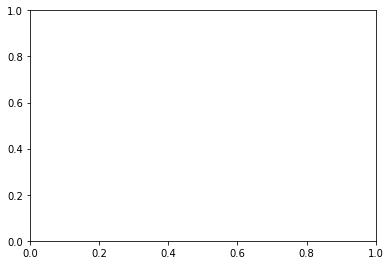

In [ ]:
#Histogram for Overall Years as a Customer
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
churn['Years as a Customer'].plot.hist(bins = 35)
ax1.set_xlabel("# of Customers")
ax1.set_ylabel("Years")
ax1.set_title("Years as a Customer")
plt.show()

In [ ]:
#Years as a Customer for Millennials
millennial_years = churn.loc[churn['Age_demographics'] == "Millennial", 'Years as a Customer']
millennial_years.describe()

count    8585.000000
mean        7.511854
std         6.046746
min         0.000000
25%         2.830000
50%         5.920000
75%        11.000000
max        37.920000
Name: Years as a Customer, dtype: float64

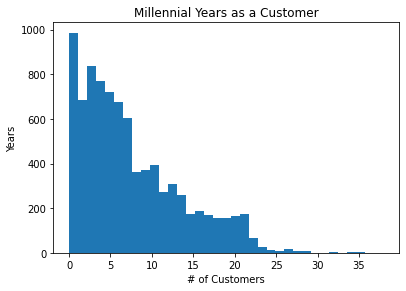

In [ ]:
#Histogram for Millennial Years as a Customer
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
millennial_years.plot.hist(bins = 35)
ax1.set_xlabel("# of Customers")
ax1.set_ylabel("Years")
ax1.set_title("Millennial Years as a Customer")
plt.show()

In [ ]:
#Years as a Customer for Gen Z
genz_years = churn.loc[churn['Age_demographics'] == "Gen Z", 'Years as a Customer']
genz_years.describe()

count    4189.000000
mean        4.437825
std         4.517203
min         0.000000
25%         1.170000
50%         2.920000
75%         6.080000
max        21.580000
Name: Years as a Customer, dtype: float64

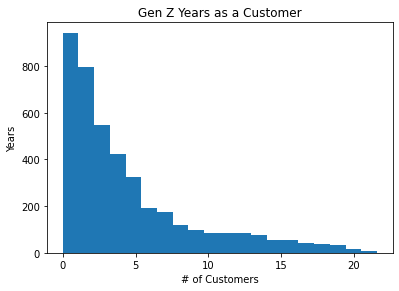

In [ ]:
#Histogram for Gen Z Years as a Customer
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
genz_years.plot.hist(bins = 20)
ax1.set_xlabel("# of Customers")
ax1.set_ylabel("Years")
ax1.set_title("Gen Z Years as a Customer")
plt.show()

In [ ]:
#Credit Cards Overall
creditflag = churn['Credit_Card_Flag']
creditflag.value_counts(normalize=True)

0.0    0.987638
1.0    0.012362
Name: Credit_Card_Flag, dtype: float64

In [ ]:
#Credit Cards for Gen Z
genz_creditflag = churn.loc[churn['Age_demographics'] == "Gen Z", 'Credit_Card_Flag']
genz_creditflag.value_counts(normalize=True)

0.0    0.994987
1.0    0.005013
Name: Credit_Card_Flag, dtype: float64

In [ ]:
#Credit Cards for Millennials
millennial_creditflag = churn.loc[churn['Age_demographics'] == "Millennial", 'Credit_Card_Flag']
millennial_creditflag.value_counts(normalize=True)

0.0    0.988934
1.0    0.011066
Name: Credit_Card_Flag, dtype: float64

In [ ]:
#Overdraft Fees YTD Overall
overdraft_fees = churn['Overdraft_fees_YTD']
print(overdraft_fees.describe())

#Overdraft Fees YTD Gen Z
overdraft_fees_genz = churn.loc[churn['Age_demographics'] == "Gen Z", 'Overdraft_fees_YTD']
print(overdraft_fees_genz.describe())

#Overdraft Fees YTD Millennial
overdraft_fees_millennial = churn.loc[(churn['Age_demographics'] == "Millennial"), 'Overdraft_fees_YTD']
print(overdraft_fees_millennial.describe())

count    43278.000000
mean        31.038773
std        217.756444
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      16672.000000
Name: Overdraft_fees_YTD, dtype: float64
count    4189.000000
mean        6.569587
std        62.612354
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2208.000000
Name: Overdraft_fees_YTD, dtype: float64
count    8585.000000
mean       35.306232
std       187.627552
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      5824.000000
Name: Overdraft_fees_YTD, dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


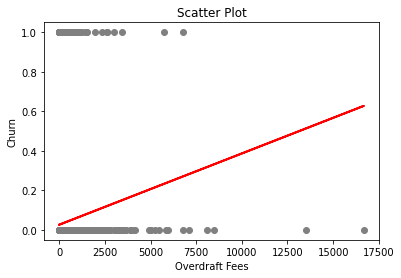

0.0        0.878784
32.0       0.039004
64.0       0.017607
96.0       0.011391
128.0      0.007856
             ...   
4000.0     0.000023
5824.0     0.000023
16672.0    0.000023
8064.0     0.000023
5728.0     0.000023
Name: Overdraft_fees_YTD, Length: 112, dtype: float64

In [ ]:
##OVERDRAFT FEES
# split dependent and independent variable
X = churn['Overdraft_fees_YTD'].dropna()
y = churn['Churned'].dropna()

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model
model = sm.OLS(y, X1).fit()
predictions = model.predict(X1)

# fit model and print results
model.summary()

#Scatterplot for Overall Overdraft Fees
plt.scatter(X, y, color='gray')
plt.plot(X, predictions, color='red', linewidth=2)

plt.title("Scatter Plot")
plt.xlabel("Overdraft Fees")
plt.ylabel("Churn")

plt.show()

#Overdraft Overall
overdraft_fees.value_counts(normalize=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


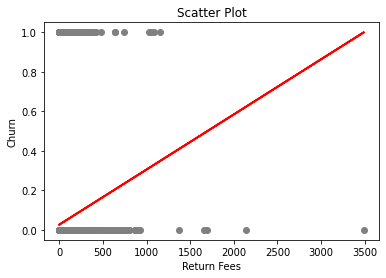

In [ ]:
##RETURN FEES YTD
# split dependent and independent variable
X = churn['Return_fees_YTD'].dropna()
y = churn['Churned'].dropna()

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model
model = sm.OLS(y, X1).fit()
predictions = model.predict(X1)

# fit model and print results
model.summary()

#Scatterplot for Overall Overdraft Fees
plt.scatter(X, y, color='gray')
plt.plot(X, predictions, color='red', linewidth=2)

plt.title("Scatter Plot")
plt.xlabel("Return Fees")
plt.ylabel("Churn")

plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


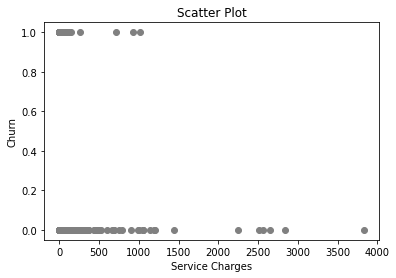

In [ ]:
##SERVICE CHARGES
# split dependent and independent variable
X = churn['Service_Charges'].dropna()
y = churn['Churned'].dropna()

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model
model = sm.OLS(y, X1).fit()
predictions = model.predict(X1)

# fit model and print results
model.summary()

#Scatterplot for Overall Overdraft Fees
plt.scatter(X, y, color='gray')
#plt.plot(X, predictions, color='red', linewidth=2)

plt.title("Scatter Plot")
plt.xlabel("Service Charges")
plt.ylabel("Churn")

plt.show()

In [ ]:
fees = pd.DataFrame()
fees['Overdraft'] = churn['Overdraft_fees_YTD'].dropna()
fees['Return'] = churn['Return_fees_YTD'].dropna()
fees['Service Charges'] = churn['Service_Charges'].dropna()
fees['WM Value'] = churn['WM_Market_Value']
fees['Churn'] = churn['Churned'].dropna()
fees.head(50)

X = fees['WM Value'].values.reshape(-1,1)
y = fees['Churn'].values.reshape(-1,1)

lr = LogisticRegression()
lr.fit(X,y)

print(lr.coef_)
print(lr.intercept_)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-4.28393854e-07]]
[-3.5614573]


In [ ]:
##OVERALL MOBILE AND TABLET APP + CHURN
app_use = pd.DataFrame()
app_use['Mobile Active'] = churn['App_90_Day_Active'].dropna()
app_use['Tablet Active'] = churn['Tablet_90_Day_Active'].dropna()
app_use['Churn'] = churn['Churned'].dropna()
app_use.head(50)

X = app_use['Mobile Active'].values.reshape(-1,1)
y = app_use['Churn'].values.reshape(-1,1)

lr = LogisticRegression()
lr.fit(X,y)

print(lr.coef_)
print(lr.intercept_)

[[0.37314985]]
[-3.70019135]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X = app_use['Tablet Active'].values.reshape(-1,1)
y = app_use['Churn'].values.reshape(-1,1)

lr = LogisticRegression()
lr.fit(X,y)

print(lr.coef_)
print(lr.intercept_)

NameError: ignored

In [ ]:
##MILLENNIALS TABLET & APP USE + CHURN
#App Use for Millennials
millennial_app_use = pd.DataFrame()
millennial_app_use['Mobile Active'] = churn.loc[churn['Age_demographics'] == "Millennial", 'App_90_Day_Active'].dropna()
millennial_app_use['Tablet Active'] = churn.loc[churn['Age_demographics'] == "Millennial", 'Tablet_90_Day_Active'].dropna()
millennial_app_use['Churn'] = churn['Churned'].dropna()

#Mobile Use for Millennials
X = millennial_app_use['Mobile Active'].values.reshape(-1,1)
y = millennial_app_use['Churn'].values.reshape(-1,1)

lr = LogisticRegression()
lr.fit(X,y)

print(lr.coef_)
print(lr.intercept_)

#Mobile Use Percentages
millennial_app_use['Mobile Active'].value_counts(normalize=True)

[[0.15474647]]
[-3.22460661]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0    0.640186
0.0    0.359814
Name: Mobile Active, dtype: float64

In [ ]:
#Tablet Use for Millenials
X = millennial_app_use['Tablet Active'].values.reshape(-1,1)
y = millennial_app_use['Churn'].values.reshape(-1,1)

lr = LogisticRegression()
lr.fit(X,y)

print(lr.coef_)
print(lr.intercept_)

#Tablet Use Percentages
millennial_app_use['Tablet Active'].value_counts(normalize=True)

[[0.31425672]]
[-3.12579555]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0    0.992429
1.0    0.007571
Name: Tablet Active, dtype: float64

In [ ]:
##GEN Z TABLET & APP USE + CHURN
#App Use for Gen Z
genz_app_use = pd.DataFrame()
genz_app_use['Mobile Active'] = churn.loc[churn['Age_demographics'] == "Gen Z", 'App_90_Day_Active'].dropna()
genz_app_use['Tablet Active'] = churn.loc[churn['Age_demographics'] == "Gen Z", 'Tablet_90_Day_Active'].dropna()
genz_app_use['Churn'] = churn['Churned'].dropna()

#Mobile Use for Gen z
X = genz_app_use['Mobile Active'].values.reshape(-1,1)
y = genz_app_use['Churn'].values.reshape(-1,1)

lr = LogisticRegression()
lr.fit(X,y)

print(lr.coef_)
print(lr.intercept_)

#Mobile Use Percentages
genz_app_use['Mobile Active'].value_counts(normalize=True)

[[0.62346742]]
[-3.64569529]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0    0.59704
1.0    0.40296
Name: Mobile Active, dtype: float64

In [ ]:
#Tablet Use for Gen Z
X = genz_app_use['Tablet Active'].values.reshape(-1,1)
y = genz_app_use['Churn'].values.reshape(-1,1)

lr = LogisticRegression()
lr.fit(X,y)

print(lr.coef_)
print(lr.intercept_)

#Tablet Use Percentages
genz_app_use['Tablet Active'].value_counts(normalize=True)

[[-0.12069446]]
[-3.34979531]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0    0.999045
1.0    0.000955
Name: Tablet Active, dtype: float64

In [ ]:
##OVERALL # OF LOANS WITH QNBT
loans = pd.DataFrame()
loans['Loans'] = churn['#_Loan_Cust'].dropna()
loans['Churn'] = churn['Churned'].dropna()

#Mobile Use Overall
X = loans['Loans'].values.reshape(-1,1)
y = loans['Churn'].values.reshape(-1,1)

lr = LogisticRegression()
lr.fit(X,y)

print(lr.coef_)
print(lr.intercept_)

#Loans Percentages
loans['Loans'].value_counts(normalize=True)

[[-0.27572911]]
[-3.53804487]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0     0.918619
1.0     0.065599
2.0     0.010167
3.0     0.003096
4.0     0.000970
5.0     0.000601
6.0     0.000277
7.0     0.000116
8.0     0.000092
10.0    0.000092
9.0     0.000069
11.0    0.000046
13.0    0.000046
15.0    0.000046
12.0    0.000046
80.0    0.000023
17.0    0.000023
29.0    0.000023
14.0    0.000023
18.0    0.000023
Name: Loans, dtype: float64

In [ ]:
##GEN Z # OF LOANS WITH QNBT
genz_loans = pd.DataFrame()
genz_loans['Loans'] = churn.loc[churn['Age_demographics'] == "Gen Z", '#_Loan_Cust'].dropna()
genz_loans['Churn'] = churn['Churned'].dropna()

X = genz_loans['Loans'].values.reshape(-1,1)
y = genz_loans['Churn'].values.reshape(-1,1)

lr = LogisticRegression()
lr.fit(X,y)

print(lr.coef_)
print(lr.intercept_)

#Loans Percentages
genz_loans['Loans'].value_counts(normalize=True)

[[-0.67887041]]
[-3.34484979]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0    0.990690
1.0    0.008116
2.0    0.000716
3.0    0.000477
Name: Loans, dtype: float64

In [ ]:
##MILLENIALS # OF LOANS WITH QNBT
millennial_loans = pd.DataFrame()
millennial_loans['Loans'] = churn.loc[churn['Age_demographics'] == "Millennial", '#_Loan_Cust'].dropna()
millennial_loans['Churn'] = churn['Churned'].dropna()

X = millennial_loans['Loans'].values.reshape(-1,1)
y = millennial_loans['Churn'].values.reshape(-1,1)

lr = LogisticRegression()
lr.fit(X,y)

print(lr.coef_)
print(lr.intercept_)

#Loans Percentages
millennial_loans['Loans'].value_counts(normalize=True)

[[-0.28886481]]
[-3.10527404]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0    0.939080
1.0    0.052650
2.0    0.005591
3.0    0.001514
4.0    0.000699
5.0    0.000349
7.0    0.000116
Name: Loans, dtype: float64

In [ ]:
##OVERALL TIME WITH QNBT & CHURN
time = pd.DataFrame()
time['Years as a Customer'] = churn['Years as a Customer'].dropna()
time['Churn'] = churn['Churned'].dropna()

#Years as a Customer
X = time['Years as a Customer'].values.reshape(-1,1)
y = time['Churn'].values.reshape(-1,1)

lr = LogisticRegression()
lr.fit(X,y)

print(lr.coef_)
print(lr.intercept_)

#Loans Percentages
time['Years as a Customer'].value_counts(normalize=True)

[[-0.06503968]]
[-3.08416221]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6.75     0.017145
6.25     0.017099
2.17     0.011091
1.17     0.010375
0.17     0.010144
           ...   
50.75    0.000023
34.92    0.000023
49.67    0.000023
34.75    0.000023
54.92    0.000023
Name: Years as a Customer, Length: 627, dtype: float64

In [ ]:
##GEN Z TIME WITH QNBT & CHURN
genz_time = pd.DataFrame()
genz_time['Years as a Customer'] = churn.loc[churn['Age_demographics'] == "Gen Z", 'Years as a Customer'].dropna()
genz_time['Churn'] = churn['Churned'].dropna()

X = genz_time['Years as a Customer'].values.reshape(-1,1)
y = genz_time['Churn'].values.reshape(-1,1)

lr = LogisticRegression()
lr.fit(X,y)

print(lr.coef_)
print(lr.intercept_)

[[-0.11161619]]
[-2.94972635]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
##MILLENNIAL TIME WITH QNBT & CHURN
millennial_time = pd.DataFrame()
millennial_time['Years as a Customer'] = churn.loc[churn['Age_demographics'] == "Millennial", 'Years as a Customer'].dropna()
millennial_time['Churn'] = churn['Churned'].dropna()

X = millennial_time['Years as a Customer'].values.reshape(-1,1)
y = millennial_time['Churn'].values.reshape(-1,1)

lr = LogisticRegression()
lr.fit(X,y)

print(lr.coef_)
print(lr.intercept_)

[[-0.10227261]]
[-2.50113352]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
reg = pd.DataFrame()
reg['Number_of_Debit_Cards'] = pcc_df['#_Debit_Card_Cust']
reg['Mortgage_Customer'] = pcc_df['Mortgage_Customer']
reg['Savings_Accounts'] = pcc_df['#_SV_Cust']
reg['Accounts_Remaining'] = pcc_df['Accounts Remaining']
reg['Years_as_Customer'] = pcc_df['Years as a Customer']
reg['Customer_Churn'] = pcc_df['Customer-Level Churn']
reg.head(50)

#Test how credit rating and student status effect credit card balance.
result = smf.ols(formula='Customer_Churn ~ Number_of_Debit_Cards+Mortgage_Customer+Savings_Accounts+Accounts_Remaining+Years_as_Customer', data=reg).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         Customer_Churn   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     922.4
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:01:19   Log-Likelihood:                 20077.
No. Observations:               36907   AIC:                        -4.014e+04
Df Residuals:                   36901   BIC:                        -4.009e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.10